In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\Combined_data.csv")
#df = df.dropna().reset_index(drop=True)
df

,Unnamed: 0,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,country,month
0,0,china’s yuan advanced to the strongest level ...,China’s #yuan advanced to the strongest level ...,2021-12-08 04:26:39,0,0,0,0,0,0,0,0,1,0,Australia,2021-12
1,1,retweet physician’s agency funded china’s bat...,RT @jsolomonReports: Fauci’s agency funded Chi...,2021-12-08 04:30:07,0,0,0,0,0,0,0,1,1,0,Australia,2021-12
2,2,and yet china has yet to apologise for this f...,@globaltimesnews And yet China has yet to apol...,2021-12-08 04:49:55,0,0,0,0,0,0,1,1,0,0,Australia,2021-12
3,3,bbc news coronavirus vaccines should work a...,BBC News - Covid: Vaccines should work against...,2021-12-08 04:56:32,0,0,0,0,0,0,1,1,0,0,Australia,2021-12
4,4,these mf rs want to lecture china on human rig...,These MF'rs want to lecture China on human rig...,2021-12-08 05:07:41,0,0,0,0,0,0,1,1,0,0,Australia,2021-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95133,95133,only one product that made in chinazi i...,@eynewil_h @KTCsmile_2 @WumaoLs @Anjilaming @t...,2021-10-11 18:16:17,0,0,0,0,0,0,1,0,0,0,UK,2021-10
95134,95134,a very comforting news we need to get this c...,A Very Comforting News. We need to get this #C...,NaN,1,0,0,0,0,0,0,0,0,0,UK,NaN
95135,95135,retweet a very comforting news we need to ge...,RT @reachind_uk: A Very Comforting News. We ne...,NaN,1,0,0,0,0,0,0,0,0,0,UK,NaN
95136,95136,while chinazi is sitting back after the mess ...,While #Chinazi is sitting back after the mess ...,NaN,1,1,0,0,0,0,1,0,0,0,UK,NaN


In [2]:
df['date'] = pd.to_datetime(df['date'])


## Polarity Score Calculation using TextBlob

In [3]:
from textblob import TextBlob
#Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

df['TextBlob_Polarity'] = df['Tweet'].apply(getPolarity)

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_168340\94256160.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TextBlob_Polarity'],bins=20, hist=True, color='midnightblue', hist_kws={'alpha':0.5, 'edgecolor':'black'})


Text(0.5, 0, 'TextBlob Polarity')

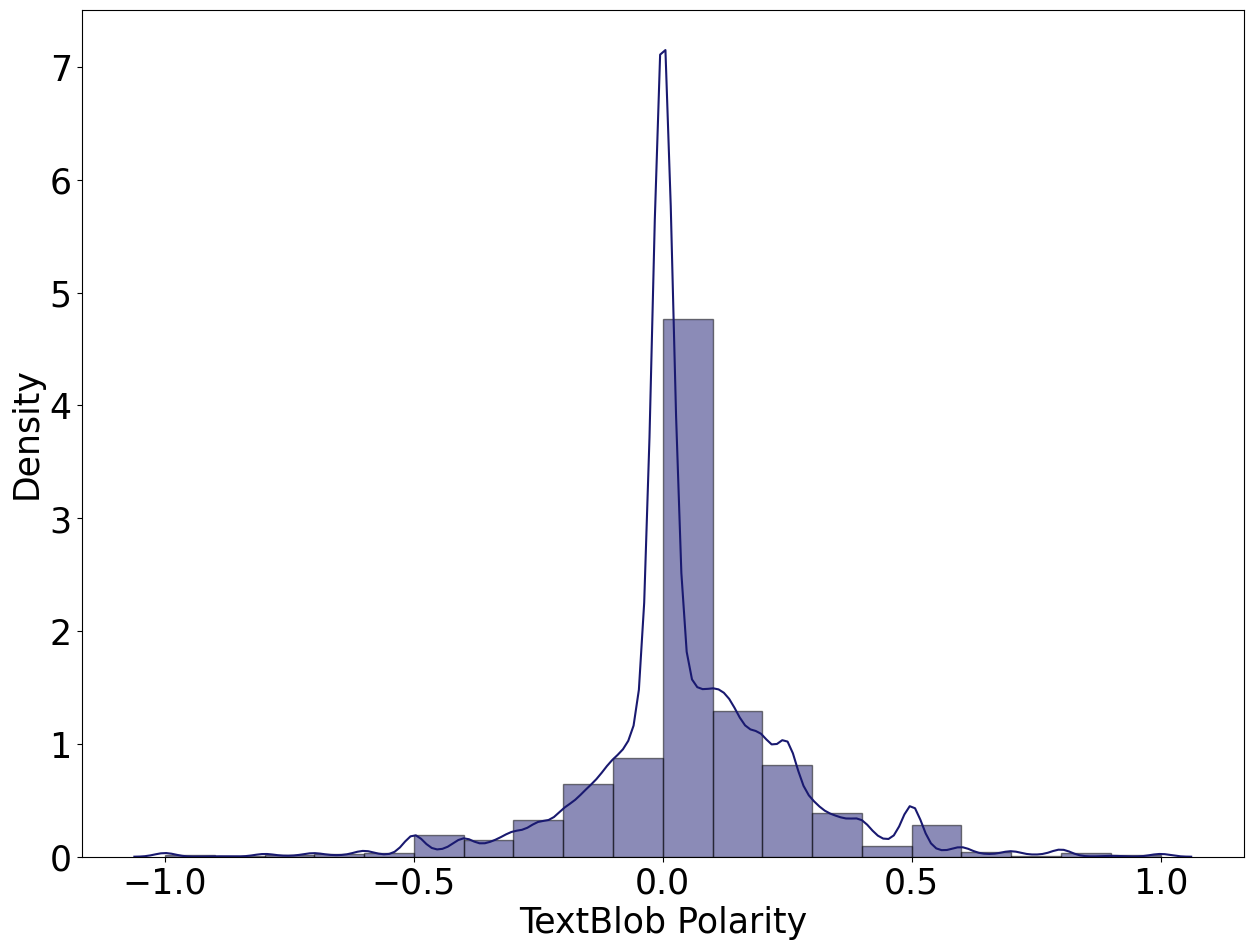

In [43]:
plt.figure(figsize=(15, 11))
sns.distplot(df['TextBlob_Polarity'],bins=20, hist=True, color='midnightblue', hist_kws={'alpha':0.5, 'edgecolor':'black'})
plt.yticks(fontsize= 25)
plt.xticks(fontsize = 25)
plt.ylabel('Density', fontsize=25)
plt.xlabel('TextBlob Polarity', fontsize=25)

## Polarity Score Calculation using Custom Sentiment Labels and Weights

In [11]:
# Define sentiment polarity and weight ratios
sentiment_polarity = {
    'Optimistic': 2,
    'Thankful': 3,
    'Joking': 1,
    'Pessimistic': -4,
    'Anxious': -2,
    'Sad': -3,
    'Annoyed': -1,
    'Denial': -5,
    'Empathetic': 0,
    'Official report': 0
}

labels = list(sentiment_polarity.keys())
weight_ratios = {
    'Optimistic': 3,
    'Thankful': 2,
    'Empathetic': 0,
    'Pessimistic': -3,
    'Anxious': -2,
    'Sad': -2,
    'Annoyed': -1,
    'Denial': -4,
    'Official report': 0,
    'Joking': 1
}



In [17]:
# Function to calculate polarity scores
def calculate_polarity_scores(df, weight_ratios):
    # Apply weight ratios to sentiment labels
    weighted_df = df[labels].apply(lambda x: x * weight_ratios[x.name])
    # Sum up the weighted scores for each row
    df['polarity_score'] = weighted_df.sum(axis=1) / len(labels)
    return df

# Calculate polarity scores for the entire DataFrame
df = calculate_polarity_scores(df, weight_ratios)

df

,Unnamed: 0,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,country,month,TextBlob_Polarity,polarity_score
0,0,china’s yuan advanced to the strongest level ...,China’s #yuan advanced to the strongest level ...,2021-12-08 04:26:39,0,0,0,0,0,0,0,0,1,0,Australia,2021-12,0.268182,0.0
1,1,retweet physician’s agency funded china’s bat...,RT @jsolomonReports: Fauci’s agency funded Chi...,2021-12-08 04:30:07,0,0,0,0,0,0,0,1,1,0,Australia,2021-12,0.000000,-0.4
2,2,and yet china has yet to apologise for this f...,@globaltimesnews And yet China has yet to apol...,2021-12-08 04:49:55,0,0,0,0,0,0,1,1,0,0,Australia,2021-12,0.000000,-0.5
3,3,bbc news coronavirus vaccines should work a...,BBC News - Covid: Vaccines should work against...,2021-12-08 04:56:32,0,0,0,0,0,0,1,1,0,0,Australia,2021-12,0.200000,-0.5
4,4,these mf rs want to lecture china on human rig...,These MF'rs want to lecture China on human rig...,2021-12-08 05:07:41,0,0,0,0,0,0,1,1,0,0,Australia,2021-12,0.366667,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95133,95133,only one product that made in chinazi i...,@eynewil_h @KTCsmile_2 @WumaoLs @Anjilaming @t...,2021-10-11 18:16:17,0,0,0,0,0,0,1,0,0,0,UK,2021-10,0.266667,-0.1
95134,95134,a very comforting news we need to get this c...,A Very Comforting News. We need to get this #C...,NaT,1,0,0,0,0,0,0,0,0,0,UK,NaN,0.116667,0.3
95135,95135,retweet a very comforting news we need to ge...,RT @reachind_uk: A Very Comforting News. We ne...,NaT,1,0,0,0,0,0,0,0,0,0,UK,NaN,0.100000,0.3
95136,95136,while chinazi is sitting back after the mess ...,While #Chinazi is sitting back after the mess ...,NaT,1,1,0,0,0,0,1,0,0,0,UK,NaN,-0.043750,0.4


In [14]:
df.to_csv("D:\\Sinophobia Sentiment Analysis\\NewFiltering\\WithPolarity.csv")

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_168340\209141763.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(polarity_scores, bins=my_bins, kde=True, color='midnightblue', hist_kws={'alpha':0.5, 'edgecolor':'black'})


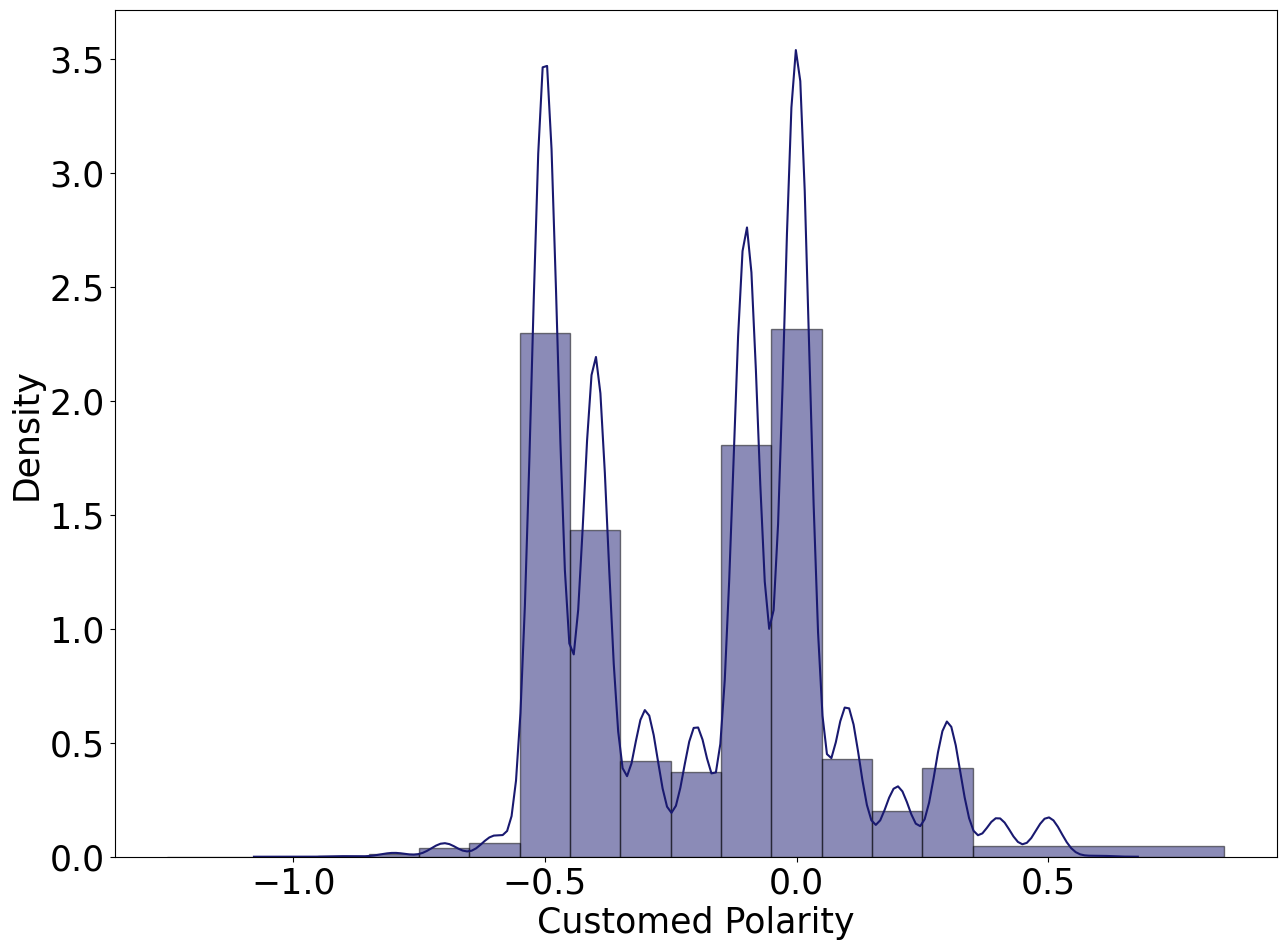

In [44]:
import numpy as np
polarity_scores = df['polarity_score']
unique_scores = sorted(polarity_scores.unique())
my_bins = [x - 0.25 for x in unique_scores] + [unique_scores[-1] + 0.25]

plt.figure(figsize=(15, 11))
sns.distplot(polarity_scores, bins=my_bins, kde=True, color='midnightblue', hist_kws={'alpha':0.5, 'edgecolor':'black'})
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.xlabel('Customed Polarity', fontsize=25)
plt.show()


C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_168340\3630812271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = weighted_df.sum(axis=1) / len(labels)
C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_168340\3630812271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = weighted_df.sum(axis=1) / len(labels)
C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_168340\3630812271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

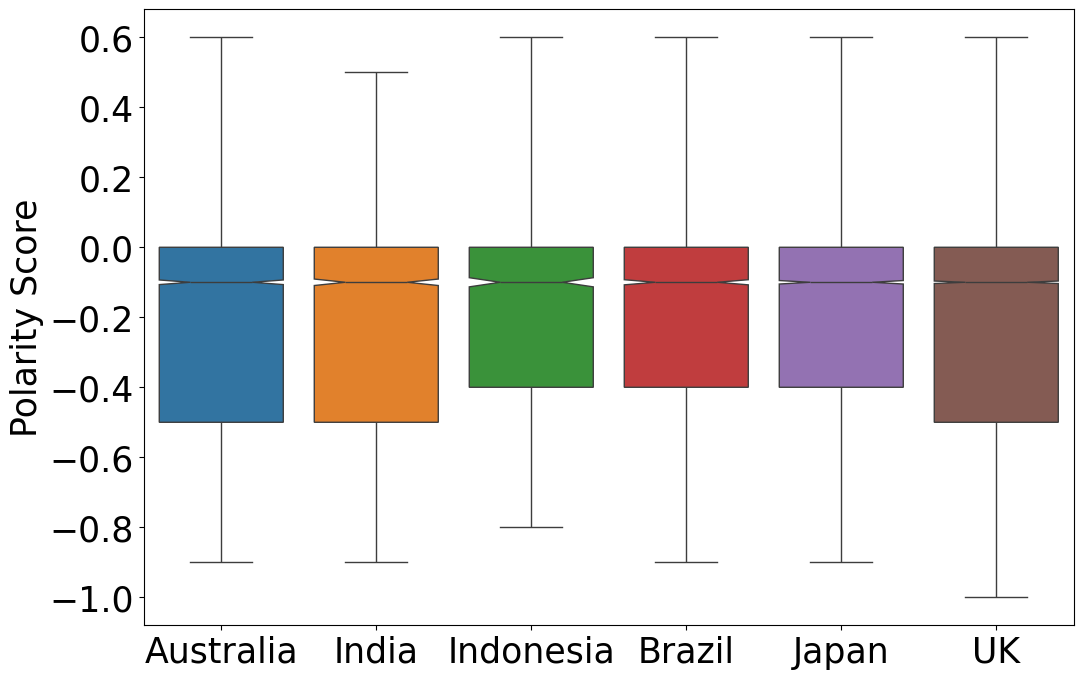

In [22]:
# Function to calculate polarity scores
def calculate_polarity_scores(df, weight_ratios):
    # Apply weight ratios to sentiment labels
    weighted_df = df[labels].apply(lambda x: x * weight_ratios[x.name])
    # Sum up the weighted scores for each row
    df['score'] = weighted_df.sum(axis=1) / len(labels)
    return df

# Filter data for specific countries
countries = ['Australia', 'India', 'Indonesia', 'Brazil', 'Japan', 'UK']
dfs = {country: df[df['country'] == country] for country in countries}

# Calculate polarity scores for each country
dfs = {country: calculate_polarity_scores(dfs[country], weight_ratios) for country in countries}

# Create a DataFrame from the polarity scores
polarity_df = pd.DataFrame({country: dfs[country]['score'] for country in countries})

# Plot the distribution of polarity scores for each country
plt.figure(figsize=(12, 8))
sns.boxplot(data=polarity_df, notch=True, showfliers=False)
plt.ylabel('Polarity Score', fontsize = 25)
plt.yticks(fontsize= 25)
plt.xticks(fontsize = 25)
plt.xticks(range(len(countries)), countries)
plt.show()

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_144328\3195163113.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_dfs = {region: dfs[region].resample('Q').mean(numeric_only=True) for region in regions}
C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_144328\3195163113.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarters = pd.date_range(start=start_date, end=end_date, freq='Q')


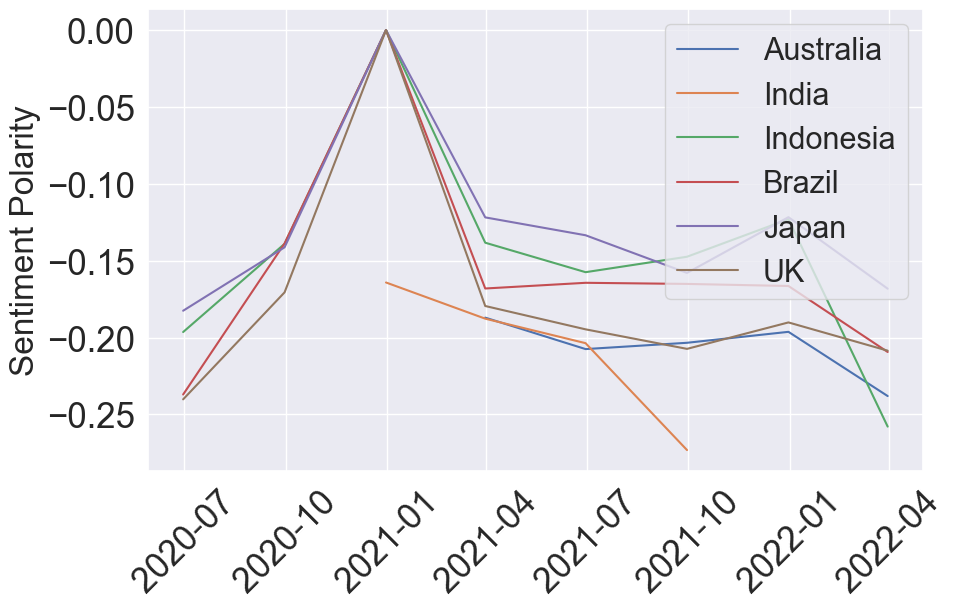

In [31]:
# Function to plot sentiment over quarters
def plot_sentiment_over_quarters_multi(dfs, regions, start_date='2018-01-01', end_date='2022-03-31'):
    dfs = {region: dfs[region].copy() for region in regions}
    dfs = {region: calculate_polarity_scores(dfs[region], weight_ratios) for region in regions}
    
    for region in regions:
        dfs[region]['date'] = pd.to_datetime(dfs[region]['date'])
        dfs[region].set_index('date', inplace=True)
    
    # Resample and calculate the mean for numeric columns only
    resampled_dfs = {region: dfs[region].resample('Q').mean(numeric_only=True) for region in regions}
    
    quarters = pd.date_range(start=start_date, end=end_date, freq='Q')
    df_resampled_filled = pd.DataFrame(index=quarters)
    
    for region in regions:
        df_resampled_filled[f'{region}_Sentiment'] = resampled_dfs[region]['score'].fillna(0)
    
    plt.figure(figsize=(10, 6))
    
    for region in regions:
        plt.plot(df_resampled_filled.index, df_resampled_filled[f'{region}_Sentiment'], label=region)
    
    plt.ylabel('Sentiment Polarity')
    plt.yticks(fontsize= 25)
    plt.xticks(fontsize = 25)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot sentiment over quarters for the specified regions
countries = ['Australia', 'India', 'Indonesia', 'Brazil', 'Japan', 'UK']
plot_sentiment_over_quarters_multi(dfs, countries)

### Distribution plot of Customed polarity

### Violin Plot

Text(0.5, 0, 'Country')

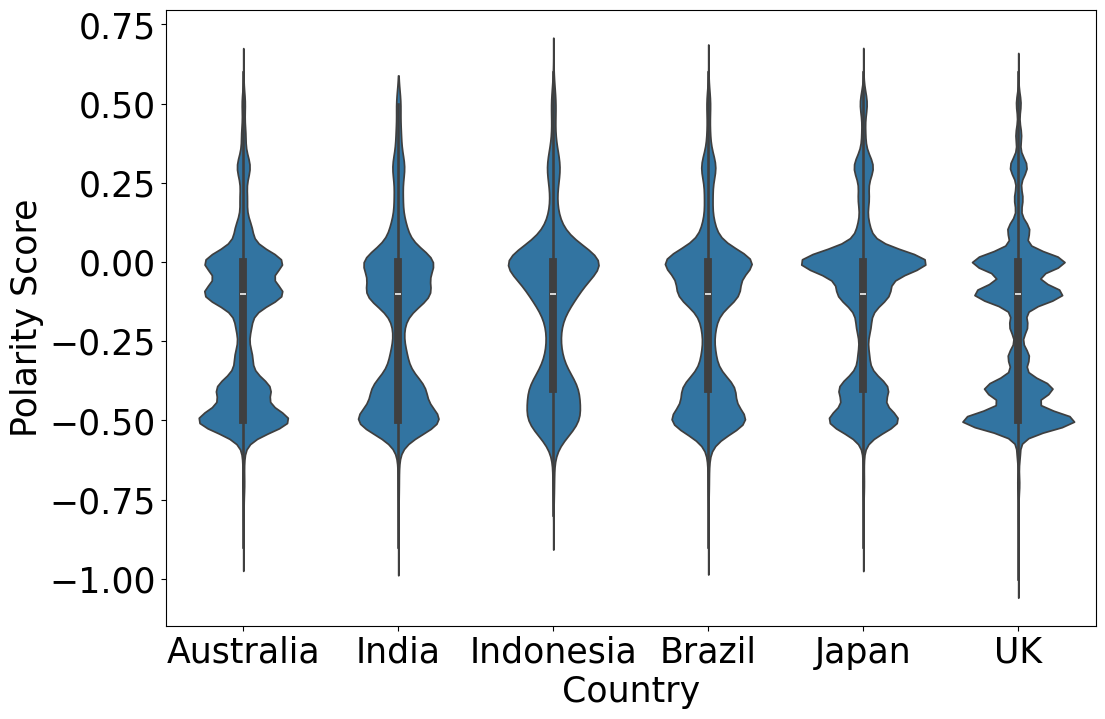

In [26]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x='country',y='polarity_score')
plt.yticks(fontsize= 25)
plt.xticks(fontsize = 25)
plt.ylabel('Polarity Score', fontsize = 25)
plt.xlabel('Country', fontsize = 25)

### Variation of Mean of Customed polarity score over months

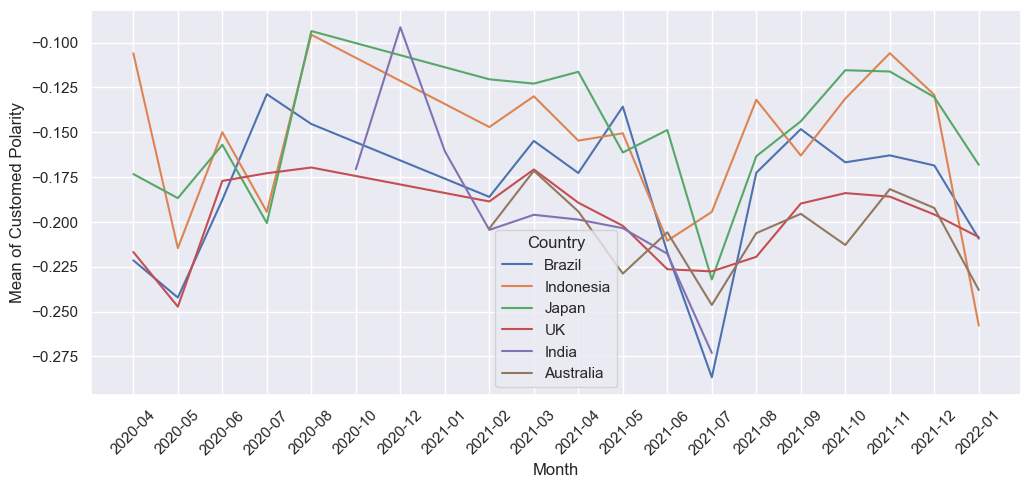

In [34]:
# Group the DataFrame by month, country, and sentiment and calculate the mean polarity score for each group
grouped = df.groupby(['month', 'country'])['polarity_score'].mean().reset_index()

# Rename the columns
grouped.columns = ['Month', 'Country', 'Mean of Customed Polarity']
     

plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Mean of Customed Polarity", hue="Country", data=grouped)
plt.xticks(rotation=45)
plt.show()

### Variation of Mean of TextBlob polarity score over months

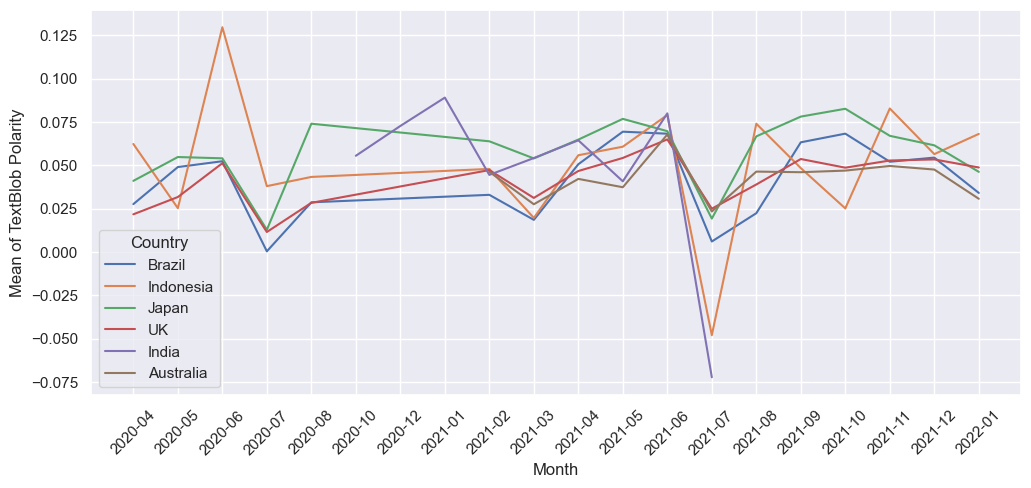

In [36]:
TB_pol = df.groupby(['month', 'country'])['TextBlob_Polarity'].mean().reset_index()

# Rename the columns
TB_pol.columns = ['Month', 'Country', 'Mean of TextBlob Polarity']
     

plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Mean of TextBlob Polarity", hue="Country", data=TB_pol)
plt.xticks(rotation=45)
plt.show()

### Heatmap

In [11]:
# Define the date ranges
start_date1 = '2020-04-01'
end_date1 = '2021-01-01'
start_date2 = '2021-01-01'
end_date2 = '2022-01-31'

# Split the dataframe based on the date ranges
df1 = df[(df['date'] >= start_date1) & (df['date'] < end_date1)]
df2 = df[(df['date'] >= start_date2) & (df['date'] < end_date2)]

In [14]:
import numpy as np
emotions = list(df.columns[4:14])
emotions.remove('Official report')
only_emotes = df2[emotions]
only_emotes

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
95127,0,0,0,0,0,0,1,0,0
95128,0,0,0,0,0,0,1,0,0
95129,0,0,0,1,0,0,0,1,0
95132,0,0,0,0,0,0,1,0,1


<Axes: >

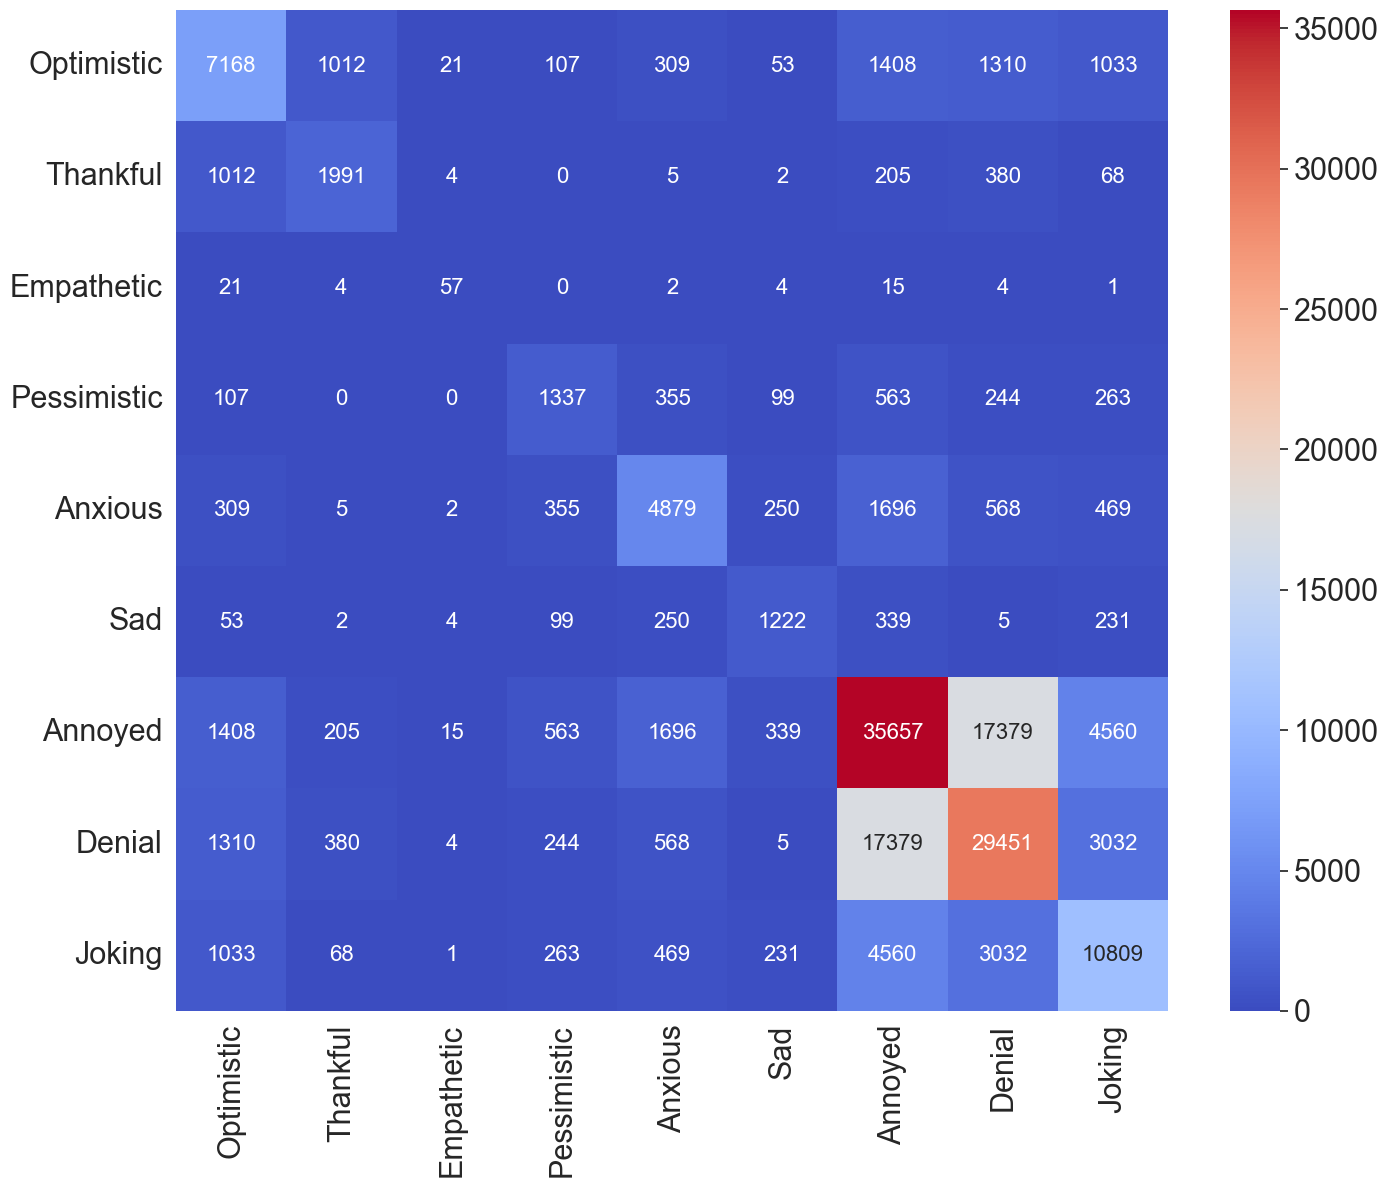

In [15]:
emote_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 
    'Joking' : 8
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)
     

fig = plt.figure(figsize = (16, 13))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns,
            fmt = 'g', annot_kws = {"size" : 16})